<a href="https://colab.research.google.com/github/camilacruz-cs/pretalab-ciclo14-python/blob/main/Aula_9_Pr%C3%A1tica_com_Pandas_e_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática de exercícios de manipulação de dados utilizando Pandas e Numpy

## Objetivos

- Consolidar os aprendizados das aulas anteriores.  
- Realizar **pré-processamento, agregações, agrupamentos e análises** com dados reais.  
- Aplicar **funções personalizadas e visualizações simples** sobre o dataset de vendas de café.


## Dataset: `vendas_cafeteria.csv`

Cada linha representa uma venda individual em uma cafeteria, incluindo:
- Data e hora da compra  
- Tipo de café vendido  
- Valor pago  
- Tipo de pagamento  
- Período do dia, dia da semana e mês  

Arquivo: https://drive.google.com/file/d/1JUF9uI-nC0bbcWjBw8hnPWRcGNLfWNqI/view?usp=sharing

### Exercício 1 — Inspeção inicial

1. Importar bibliotecas e carregar o dataset

2. Mostre as 5 primeiras linhas do dataset.

3. Verifique o tipo de dados de cada coluna.

4. Verifique se há valores ausentes.

In [19]:
import pandas as pd

vendas = pd.read_csv('vendas_cafeteria.csv')

In [2]:
vendas.head(5)

,hora_do_dia,tipo_pagamento,valor,nome_cafe,periodo_do_dia,dia_da_semana,mes,ordem_dia,ordem_mes,data,hora
0,10,cartão,38.7,Latte,Manhã,Sex,Março,5,3,2024-03-01,10:15:50.520000
1,12,cartão,38.7,Chocolate Quente,Tarde,Sex,Março,5,3,2024-03-01,12:19:22.539000
2,12,cartão,38.7,Chocolate Quente,Tarde,Sex,Março,5,3,2024-03-01,12:20:18.089000
3,13,cartão,28.9,Café Americano,Tarde,Sex,Março,5,3,2024-03-01,13:46:33.006000
4,13,cartão,38.7,Latte,Tarde,Sex,Março,5,3,2024-03-01,13:48:14.626000


In [3]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hora_do_dia     3547 non-null   int64  
 1   tipo_pagamento  2698 non-null   object 
 2   valor           3547 non-null   float64
 3   nome_cafe       3547 non-null   object 
 4   periodo_do_dia  3547 non-null   object 
 5   dia_da_semana   3547 non-null   object 
 6   mes             3547 non-null   object 
 7   ordem_dia       3547 non-null   int64  
 8   ordem_mes       3547 non-null   int64  
 9   data            3547 non-null   object 
 10  hora            3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [5]:
vendas.isnull().sum()

,0
hora_do_dia,0
tipo_pagamento,849
valor,0
nome_cafe,0
periodo_do_dia,0
dia_da_semana,0
mes,0
ordem_dia,0
ordem_mes,0
data,0


In [6]:
vendas.describe()

,hora_do_dia,valor,ordem_dia,ordem_mes
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


### Exercício 2 — Padronização e limpeza básica

1. Verifique se há valores ausentes na coluna `tipo_pagamento`.

2. Substitua qualquer valor ausente em `tipo_pagamento` por "indefinido".

3. Verifique novamente se ainda há valores nulos.

In [20]:
vendas['tipo_pagamento'].isnull().sum()

np.int64(849)

In [21]:
vendas['tipo_pagamento'] = vendas['tipo_pagamento'].fillna('Indefinido')

In [22]:
vendas['tipo_pagamento'].isnull().sum()

np.int64(0)

### Exercício 3
1. Quais são todos os tipos de cafés vendidos?

2. Qual tipo de café teve o maior número de vendas?

3. Qual tipo de café gerou o maior faturamento total?

4. Qual a média de valor por tipo de café?

In [40]:
vendas['nome_cafe'].unique()

array(['Latte', 'Chocolate Quente', 'Café Americano',
       'Americano com Leite', 'Cocoa', 'Cortado', 'Expresso', 'Capuccino'],
      dtype=object)

In [41]:
vendas['nome_cafe'].value_counts(ascending=False)

,count
nome_cafe,
Americano com Leite,809
Latte,757
Café Americano,564
Capuccino,486
Cortado,287
Chocolate Quente,276
Cocoa,239
Expresso,129


In [31]:
vendas.groupby('nome_cafe')['valor'].sum().sort_values(ascending=False)


,valor
nome_cafe,
Latte,26875.30
Americano com Leite,24751.12
Capuccino,17439.14
Café Americano,14650.26
Chocolate Quente,9933.46
Cocoa,8521.16
Cortado,7384.86
Expresso,2690.28


In [42]:
vendas.groupby('nome_cafe')['valor'].mean().sort_values(ascending=False)


,valor
nome_cafe,
Chocolate Quente,35.990797
Capuccino,35.883004
Cocoa,35.653389
Latte,35.502378
Americano com Leite,30.594710
Café Americano,25.975638
Cortado,25.731220
Expresso,20.854884


### Exercício 4

1. Qual total de vendas por dia da semana? Ordene o resultado de forma crescente.

2. Em qual horário do dia ocorrem mais vendas?

3. Qual o valor médio das vendas por mês?

4. Há diferença no ticket médio entre pagamentos em cartão e dinheiro?

In [43]:
#Total vendas por dia da semana

vendas.groupby('dia_da_semana')['valor'].mean().sort_values(ascending=False)

,valor
dia_da_semana,
Seg,31.917463
Dom,31.828305
Ter,31.762902
Sex,31.583947
Qui,31.551765
Qua,31.500920
Sáb,31.347915


In [48]:
#Horário que ocorrem mais vendas

vendas.groupby('periodo_do_dia')['valor'].sum().sort_values(ascending=False)

,valor
periodo_do_dia,
Night,38186.34
Tarde,38130.04
Manhã,35929.20


In [45]:
#Valor médio mês

vendas.groupby('mes')['valor'].mean().sort_values(ascending=False)

,valor
mes,
Junho,34.160359
Abril,34.045000
Maio,33.877261
Novembro,33.168108
Outubro,32.608357
Março,32.169312
Janeiro,31.835124
Dezembro,31.805946
Fevereiro,31.242270


In [46]:
#Ticket médio entre meios de pagamento

vendas.groupby('tipo_pagamento')['valor'].mean().sort_values(ascending=False)

,valor
tipo_pagamento,
cartão,31.743364
dinheiro,31.691250
Indefinido,31.340188


### Exercício 5

1. Crie uma nova coluna chamada valor_total, que some o valor pago com 10% de taxa de serviço.

2. Crie uma nova coluna categoria_valor com:

- "alta" se o valor for maior que R$40,

- "média" se entre R$20 e R$40,

- "baixa" se menor que R$20.

3. Responda: Quantas vendas pertencem a cada categoria?

In [64]:
vendas['valor_total'] = vendas['valor'] * 1.10

In [65]:
vendas.head()

,hora_do_dia,tipo_pagamento,valor,nome_cafe,periodo_do_dia,dia_da_semana,mes,ordem_dia,ordem_mes,data,hora,valor_total,categoria
0,10,cartão,38.7,Latte,Manhã,Sex,Março,5,3,2024-03-01,10:15:50.520000,42.57,baixa
1,12,cartão,38.7,Chocolate Quente,Tarde,Sex,Março,5,3,2024-03-01,12:19:22.539000,42.57,baixa
2,12,cartão,38.7,Chocolate Quente,Tarde,Sex,Março,5,3,2024-03-01,12:20:18.089000,42.57,baixa
3,13,cartão,28.9,Café Americano,Tarde,Sex,Março,5,3,2024-03-01,13:46:33.006000,31.79,baixa
4,13,cartão,38.7,Latte,Tarde,Sex,Março,5,3,2024-03-01,13:48:14.626000,42.57,baixa


In [67]:
vendas['categoria'] = vendas['valor'].apply(
    lambda x: 'baixa' if x < 200 else
              ('médio' if 20 <= x <= 40 else 'alto')
)

In [73]:
#vendas.drop(columns=["categoria"],inplace=True)

In [76]:
#Outro jeito

def classificar_valor(valor):
  if valor > 30:
    return 'alta'
  elif valor >= 20:
    return 'media'
  else:
    return 'baixa'

In [78]:
vendas['categoria_valor'] = vendas['valor'].apply(classificar_valor)

In [79]:
vendas.head()

,hora_do_dia,tipo_pagamento,valor,nome_cafe,periodo_do_dia,dia_da_semana,mes,ordem_dia,ordem_mes,data,hora,valor_total,categoria_valor
0,10,cartão,38.7,Latte,Manhã,Sex,Março,5,3,2024-03-01,10:15:50.520000,42.57,alta
1,12,cartão,38.7,Chocolate Quente,Tarde,Sex,Março,5,3,2024-03-01,12:19:22.539000,42.57,alta
2,12,cartão,38.7,Chocolate Quente,Tarde,Sex,Março,5,3,2024-03-01,12:20:18.089000,42.57,alta
3,13,cartão,28.9,Café Americano,Tarde,Sex,Março,5,3,2024-03-01,13:46:33.006000,31.79,media
4,13,cartão,38.7,Latte,Tarde,Sex,Março,5,3,2024-03-01,13:48:14.626000,42.57,alta


In [80]:
vendas['categoria_valor'].value_counts()


,count
categoria_valor,
alta,2345
media,1166
baixa,36


### Exercício 6 - Visualização de dados com Pandas

1. Crie um gráfico de barras mostrando o **faturamento total** por tipo de café.

2. Crie um gráfico mostrando como as vendas estão distribuídas entre os tipos de pagamento.

3. Crie um gráfico de linha mostrando o faturamento total diário ao longo do tempo.

- Adicione título no gráfico e nos eixos, bem como grid no gráfico de linha.


<Axes: xlabel='nome_cafe'>

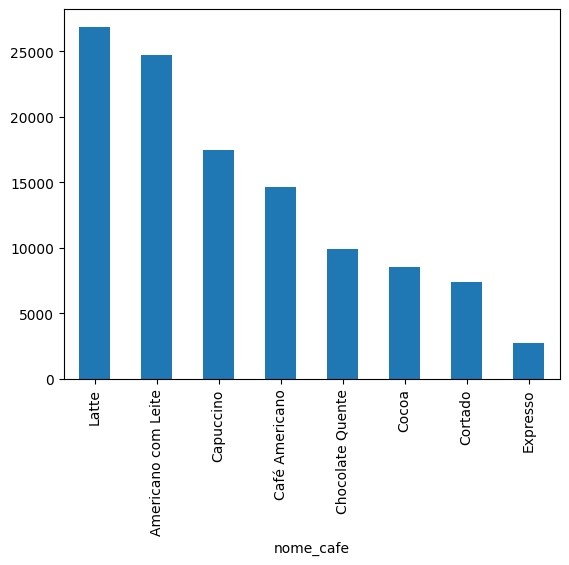

In [87]:
vendas.groupby('nome_cafe')['valor'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='tipo_pagamento'>

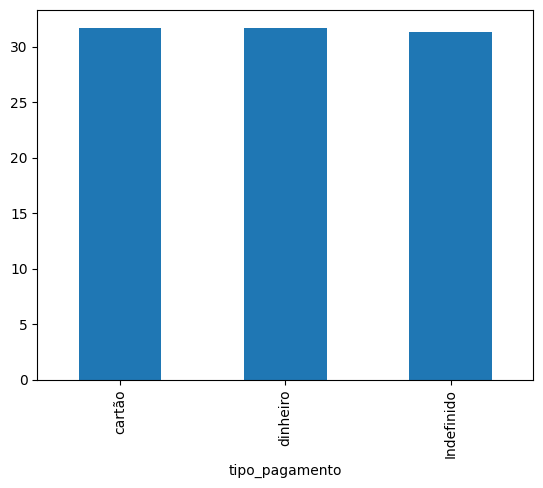

In [90]:
vendas.groupby('tipo_pagamento')['valor'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: title={'center': 'Evolução - Faturamento diário'}, xlabel='Data', ylabel='Faturamento em Reais (R$)'>

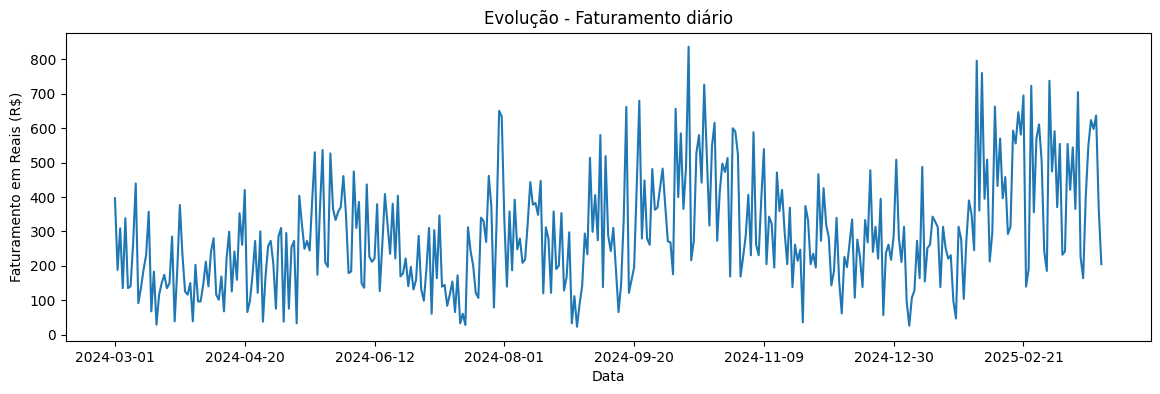

In [95]:
vendas.groupby('data')['valor'].sum().plot(
    figsize=(14,4),
    title = 'Evolução - Faturamento diário',
    ylabel = 'Faturamento em Reais (R$)',
    xlabel = 'Data')